## Quantum Teleportation Notebook

In [71]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [72]:
# Run the circuit on a simulator
def run_circuit(circuit, shots):
    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=shots)

    # Get results from the job
    result = job.result()
    
    # Get output from the result object
    counts = result.get_counts(circuit)
    
    return counts

**1) Teleport a qubit in the state $\frac{1}{\sqrt 2}(|0\rangle + |1\rangle)$**

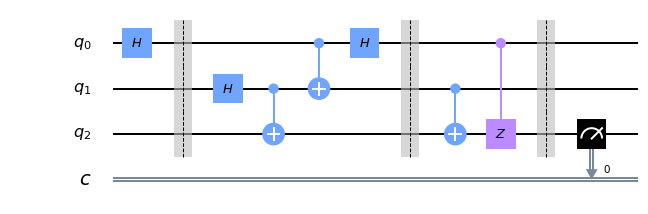

In [48]:
# Create the 3 qubit circuit
circuit = QuantumCircuit(3, 1)

# Prepare the qubit to teleport
circuit.h(0)
circuit.barrier()

# Create entangled state between sender and receiver qubit
circuit.h(1)
circuit.cx(1, 2)

# Entangle teleport qubit and sender qubit
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

# Relay information from sender to receiver
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()

# Measure the receiver qubit
circuit.measure(2, 0)

# Draw the circuit
circuit.draw()

In [49]:
# Run circuit and display results
result = run_circuit(circuit, 1024)
print("\nTeleported qubit info: ", result)


Teleported qubit info:  {'1': 490, '0': 534}


**2) Teleport two bits: 01 through *Superdense Coding* algorithm**

In [66]:
# Helper functions for Superdense Coding

# Applies gates to circuit based on the given 2 bits
def transform(circuit, qubit, bits):
    if bits == "00":
        pass
    elif bits == "01":
        circuit.z(qubit)
    elif bits == "10":
        circuit.x(qubit)
    elif bits == "11":
        circuit.z(qubit)
        circuit.x(qubit)
    else:
        print("Error message: Invalid bits. Processing as '00' bits")

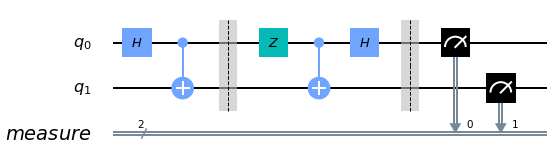

In [69]:
# bits to encode
bits = '01'

# Create the 2 qubit circuit
circuit = QuantumCircuit(2)

# Entangle the 2 qubits
circuit.h(0)
circuit.cx(0,1)
circuit.barrier()

# Apply transformation gate on sender qubit
transform(circuit, 0, bits)

# Decode the bits on the receiver side
circuit.cx(0, 1)
circuit.h(0)

# Measure the output
circuit.measure_all()

# Draw the circuit
circuit.draw()

In [70]:
# Run circuit and display results
result = run_circuit(circuit, 1024)
print("\nTeleported classical bit info: ", result)


Teleported classical bit info:  {'01': 1024}
